In [10]:
import pandas as pd

# Load one example category
df = pd.read_csv("../data/similarity_outputs/resume_skills_similarity_matrix.csv")

print("🔍 Sample Preview:")
print(df.head(3))

# 1. How many unique resumes?
print("\n📌 Unique Resumes:", df["resume_id"].nunique())

# 2. KSA reused across resumes
ksa_resume_counts = df.groupby("skills_entity")["resume_id"].nunique().sort_values(ascending=False)
print("\n🔁 Top KSAs shared by many resumes:")
print(ksa_resume_counts.head(5))

# 3. KSA used across multiple job titles
ksa_jobtitle_counts = df.groupby("skills_entity")["entity_job_title"].nunique().sort_values(ascending=False)
print("\n🔁 KSAs linked to multiple job titles:")
print(ksa_jobtitle_counts.head(5))

# 4. Job title mapped to multiple KSAs
jobtitle_ksa_counts = df.groupby("entity_job_title")["skills_entity"].nunique().sort_values(ascending=False)
print("\n📌 Job titles with the most unique KSAs:")
print(jobtitle_ksa_counts.head(5))

# 5. Resume coverage: KSAs per resume
resume_coverage = df.groupby("resume_id")["skills_entity"].nunique().sort_values(ascending=False)
print("\n📊 Top resumes with highest KSA coverage:")
print(resume_coverage.head(5))

# 6. Check for exact duplicates
duplicate_rows = df.duplicated(subset=["resume_id", "noun_phrase", "skills_entity", "entity_job_title", "onetsoc_code"])
print("\n⚠️ Duplicate rows:", duplicate_rows.sum())


🔍 Sample Preview:
                              resume_id  \
0  44e03fc5-fe05-45dd-a269-d24bb7c99c9e   
1  44e03fc5-fe05-45dd-a269-d24bb7c99c9e   
2  44e03fc5-fe05-45dd-a269-d24bb7c99c9e   

                                         resume_text  noun_phrase  \
0  Education Details B. Tech Rayat and Bahra Inst...  programming   
1  Education Details B. Tech Rayat and Bahra Inst...  programming   
2  Education Details B. Tech Rayat and Bahra Inst...  programming   

  skills_entity  similarity_score                 entity_job_title  \
0   Programming               1.0                 Chief Executives   
1   Programming               1.0    Chief Sustainability Officers   
2   Programming               1.0  General and Operations Managers   

  onetsoc_code scale_id  data_value  
0   11-1011.00       IM        1.75  
1   11-1011.03       IM        1.88  
2   11-1021.00       IM        1.50  

📌 Unique Resumes: 68

🔁 Top KSAs shared by many resumes:
skills_entity
Programming          21
Tec

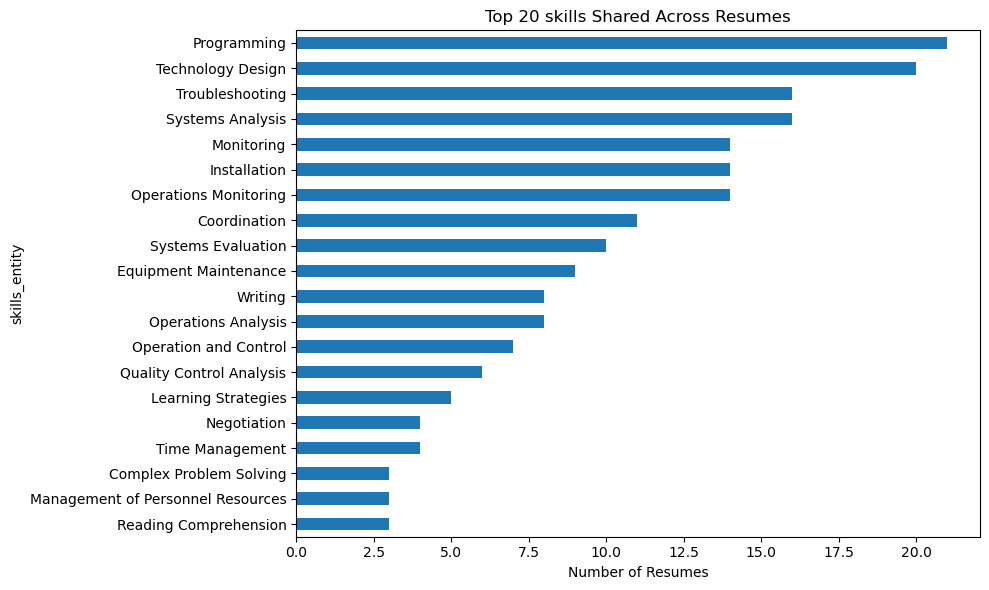

In [11]:
import matplotlib.pyplot as plt

ksa_resume_counts.head(20).plot(kind='barh', figsize=(10, 6), title='Top 20 skills Shared Across Resumes')
plt.gca().invert_yaxis()
plt.xlabel("Number of Resumes")
plt.tight_layout()
plt.show()


In [12]:
df.keys()

Index(['resume_id', 'resume_text', 'noun_phrase', 'skills_entity',
       'similarity_score', 'entity_job_title', 'onetsoc_code', 'scale_id',
       'data_value'],
      dtype='object')